**Problem Statement: Avocado is a fruit consumed by people heavily in the United States. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.**

#### Importing libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LarsCV,LassoLarsCV,LassoCV,ElasticNetCV,BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import joblib

##### Uploading dataset

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#### Unnamed is not relevant columns as a result dropping it.

### EDA

In [4]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (18249, 13)


In [5]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


<AxesSubplot:>

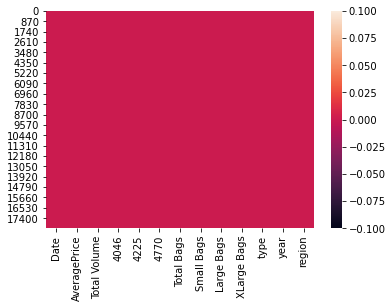

In [7]:
sn.heatmap(df.isnull())

##### No Null Values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Date,type,region are  object type
year is of int type. rest all are float.

In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


There is huge varaince in quartile range which means chance of ouliers present in them.
High Standard Deviation in  XLargeBags,Total Bags rate and small Bags.

#### convert all categorical data into numerical type

In [10]:
#Date
for i in range(len(df.Date)):
    df.Date[i]=int(df.Date[i][5:7])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [11]:
#year
for i in range(len(df.year)):
    df.year[i]=int(df.year[i]-2000)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,15,Albany
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,15,Albany
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,15,Albany
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,15,Albany
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,15,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,18,WestTexNewMexico
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,18,WestTexNewMexico
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,18,WestTexNewMexico
18247,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,18,WestTexNewMexico


In [12]:
#type
dicty={}
for i in df[['type']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'type': {'conventional': 0, 'organic': 1}}

<AxesSubplot:xlabel='type', ylabel='count'>

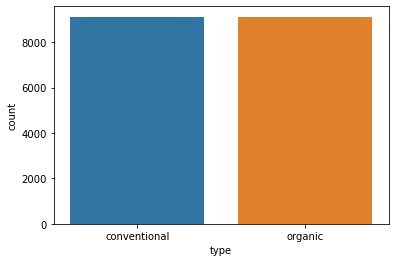

In [14]:
sn.countplot(x='type',data=df)

##### Type is equally distributed between conventional and organic

In [15]:
for i in ['type']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,15,Albany
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,15,Albany
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,15,Albany
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,15,Albany
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,15,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,18,WestTexNewMexico
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,18,WestTexNewMexico
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,18,WestTexNewMexico
18247,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,18,WestTexNewMexico


<AxesSubplot:xlabel='year', ylabel='count'>

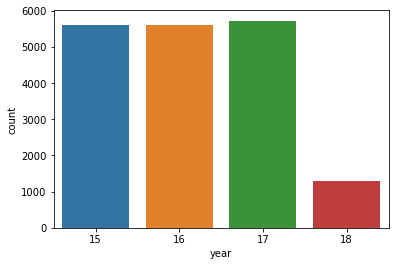

In [16]:
sn.countplot(x='year',data=df)

##### Avocado was least consumed in the 2018 year

In [17]:
df['region'].value_counts()

Seattle                338
Nashville              338
Midsouth               338
Denver                 338
Detroit                338
Portland               338
Northeast              338
HartfordSpringfield    338
LosAngeles             338
Spokane                338
NorthernNewEngland     338
Atlanta                338
Pittsburgh             338
TotalUS                338
LasVegas               338
Albany                 338
RichmondNorfolk        338
Boise                  338
Southeast              338
Columbus               338
Orlando                338
BuffaloRochester       338
California             338
Charlotte              338
SanFrancisco           338
NewOrleansMobile       338
Plains                 338
SanDiego               338
SouthCentral           338
Indianapolis           338
Syracuse               338
Boston                 338
West                   338
Chicago                338
Jacksonville           338
NewYork                338
Sacramento             338
R

In [18]:
dicty={}
for i in df[['region']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'region': {'Albany': 0,
  'Atlanta': 1,
  'BaltimoreWashington': 2,
  'Boise': 3,
  'Boston': 4,
  'BuffaloRochester': 5,
  'California': 6,
  'Charlotte': 7,
  'Chicago': 8,
  'CincinnatiDayton': 9,
  'Columbus': 10,
  'DallasFtWorth': 11,
  'Denver': 12,
  'Detroit': 13,
  'GrandRapids': 14,
  'GreatLakes': 15,
  'HarrisburgScranton': 16,
  'HartfordSpringfield': 17,
  'Houston': 18,
  'Indianapolis': 19,
  'Jacksonville': 20,
  'LasVegas': 21,
  'LosAngeles': 22,
  'Louisville': 23,
  'MiamiFtLauderdale': 24,
  'Midsouth': 25,
  'Nashville': 26,
  'NewOrleansMobile': 27,
  'NewYork': 28,
  'Northeast': 29,
  'NorthernNewEngland': 30,
  'Orlando': 31,
  'Philadelphia': 32,
  'PhoenixTucson': 33,
  'Pittsburgh': 34,
  'Plains': 35,
  'Portland': 36,
  'RaleighGreensboro': 37,
  'RichmondNorfolk': 38,
  'Roanoke': 39,
  'Sacramento': 40,
  'SanDiego': 41,
  'SanFrancisco': 42,
  'Seattle': 43,
  'SouthCarolina': 44,
  'SouthCentral': 45,
  'Southeast': 46,
  'Spokane': 47,
  'StLouis'

<AxesSubplot:xlabel='region', ylabel='count'>

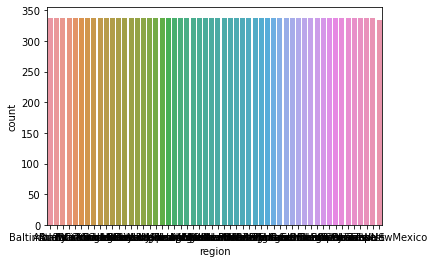

In [19]:
sn.countplot(x='region',data=df)

In [20]:
for i in ['region']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,15,0
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,15,0
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,15,0
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,15,0
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,18,53
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,18,53
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,18,53
18247,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,18,53


In [21]:
df = df.astype({'Date': np.int})

In [22]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,6.177215,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,16.147899,26.495644
std,3.534130,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,15.000000,0.000000
25%,3.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,15.000000,13.000000
50%,6.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,16.000000,26.000000
75%,9.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,17.000000,40.000000
max,12.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,18.000000,53.000000


### Correlation

In [23]:
df.corr()['AveragePrice']

Date            0.162409
AveragePrice    1.000000
Total Volume   -0.192752
4046           -0.208317
4225           -0.172928
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
type            0.615845
year            0.093197
region         -0.011716
Name: AveragePrice, dtype: float64

<AxesSubplot:>

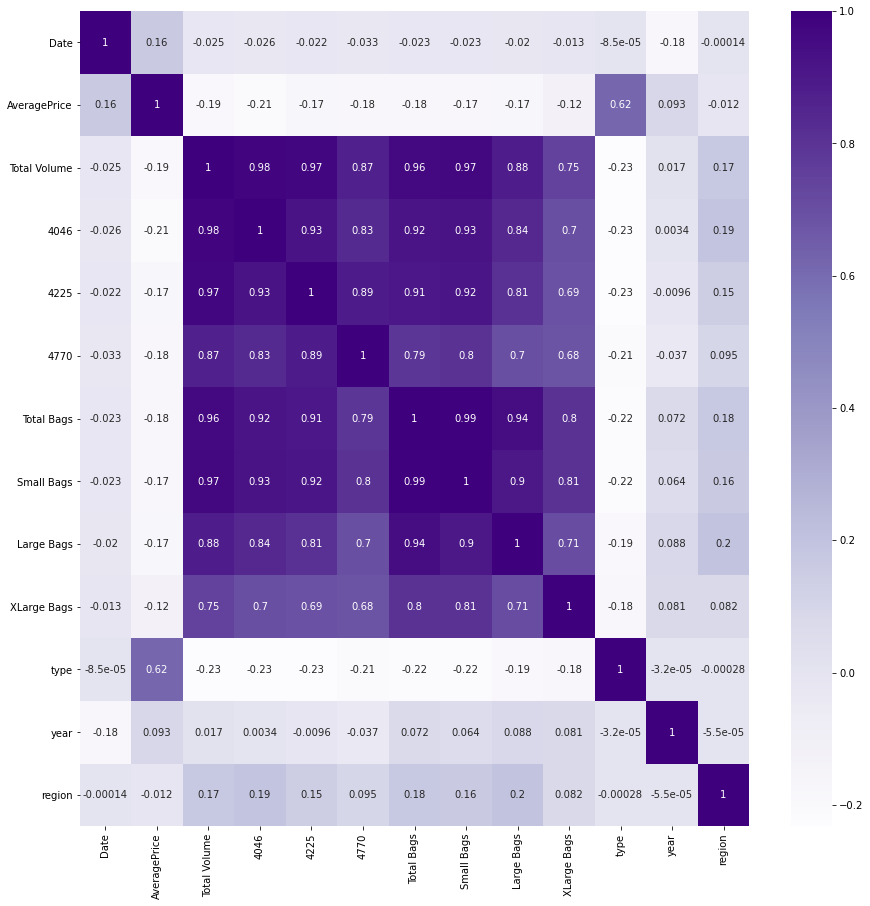

In [24]:
plt.figure(figsize=[15,15])
sn.heatmap(df.corr(),annot=True,cmap='Purples')

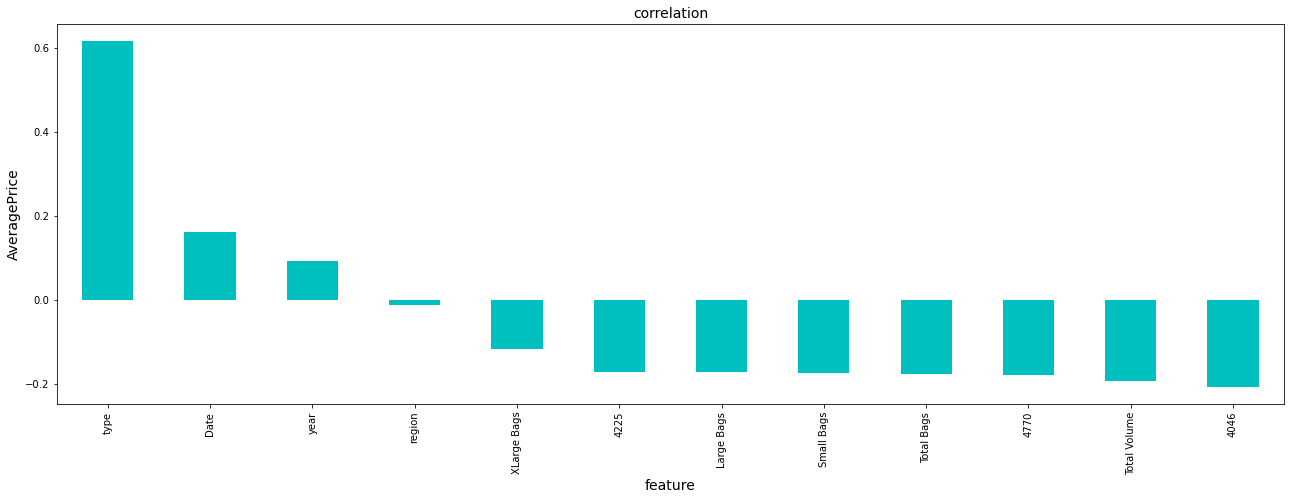

In [25]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('AveragePrice',fontsize=14)
plt.title('correlation',fontsize =14)
plt.show()

##### Type, Date, year, region are positively correlated and rest all are negative correlated

##### Check Distribution plot

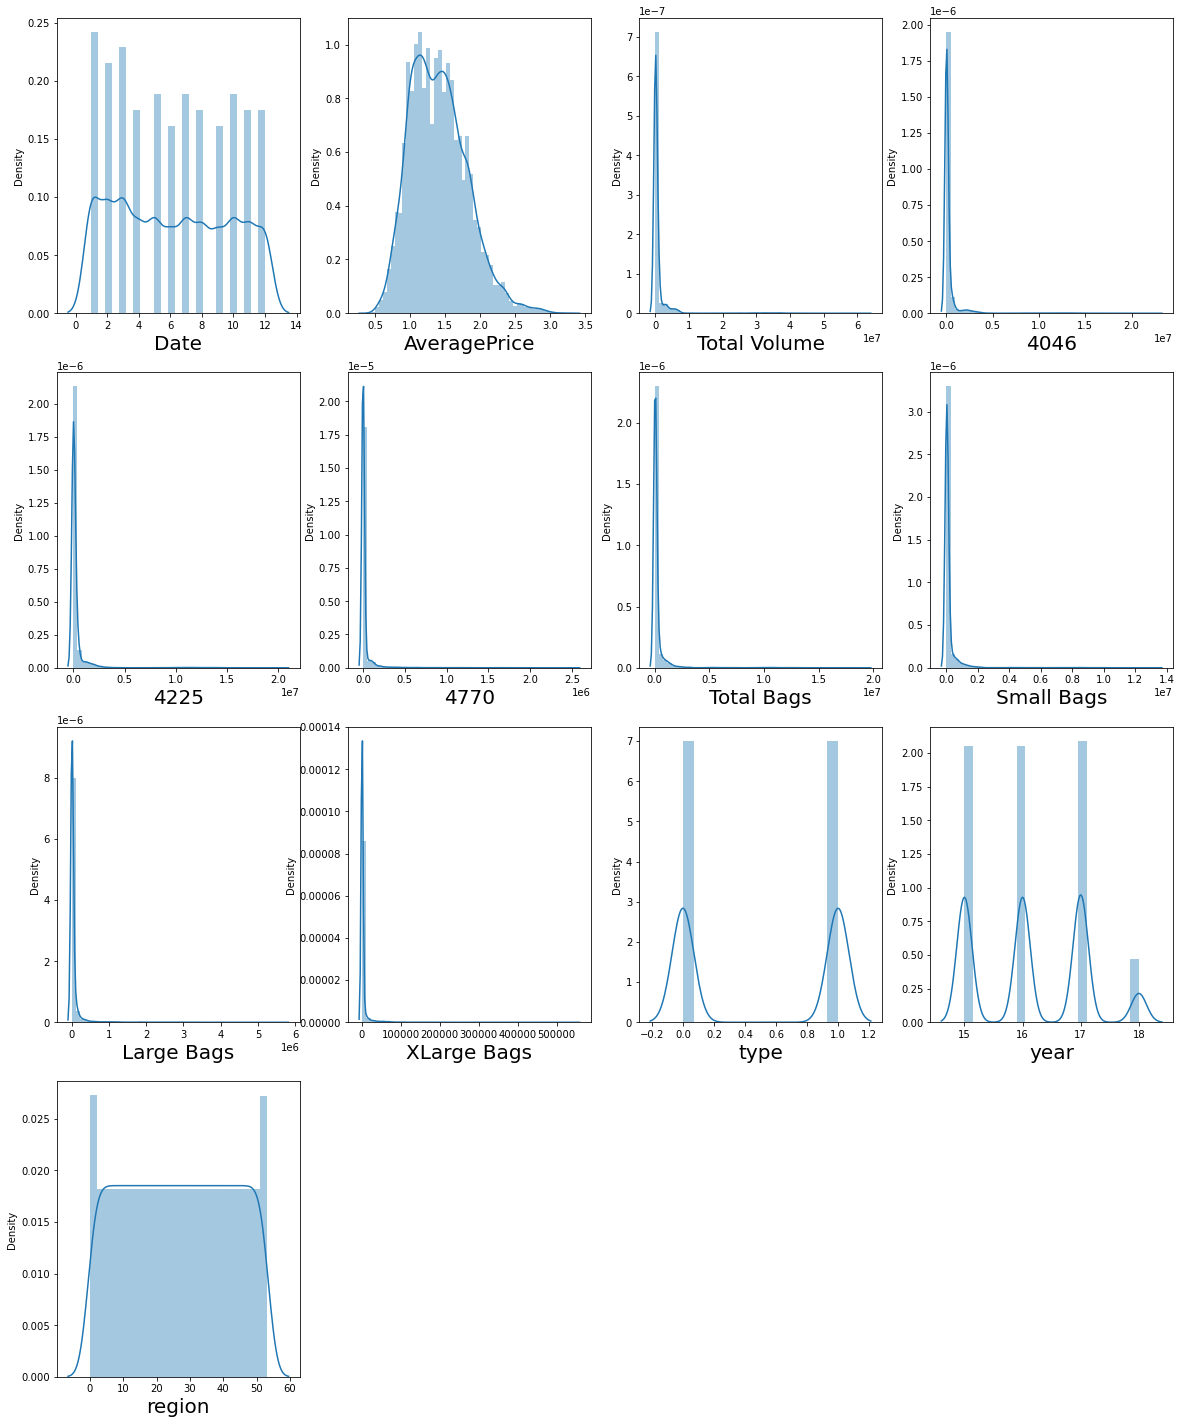

In [26]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(4,4,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

`type & year has bimodial distribution plot
Independent variables are positively skewed'

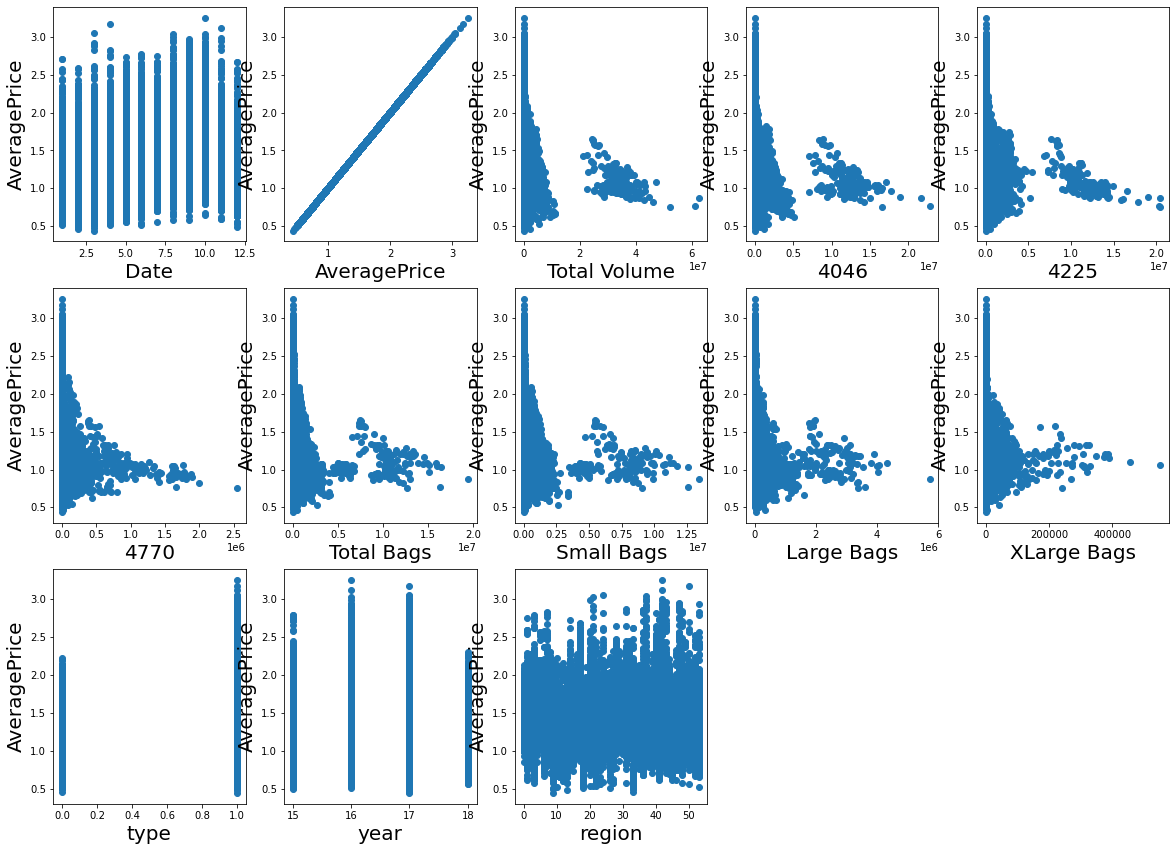

In [27]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter(df[i],df['AveragePrice'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
    plotnumber+=1
plt.show()

Correlation is very low, Type column is highly correlated.
But let's put practical perspective 
-Avocado Quality differ according to region
-The year when avocado are most produced can change the paramters of quanity available at
 certain period of time when demand is high and supply is low which in turn affects the price.

##### Check Outliers

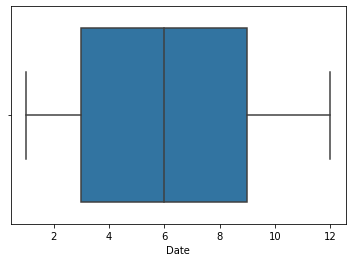

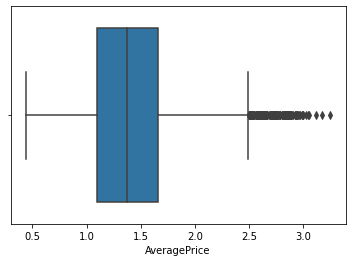

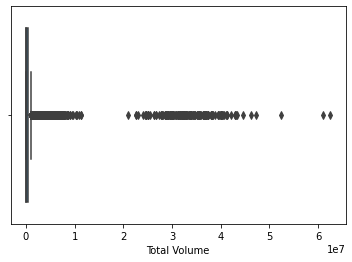

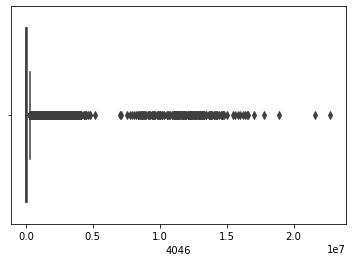

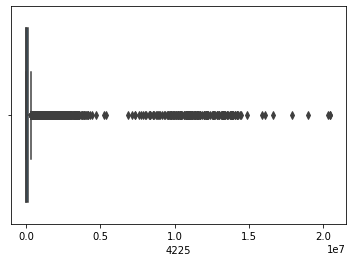

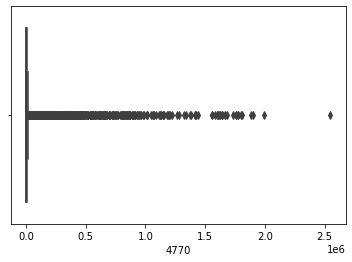

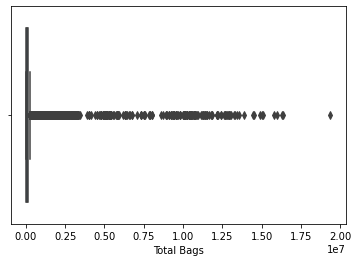

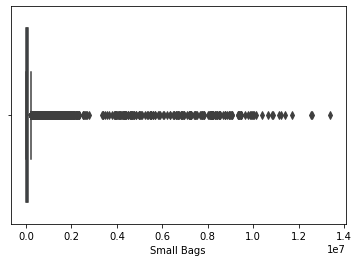

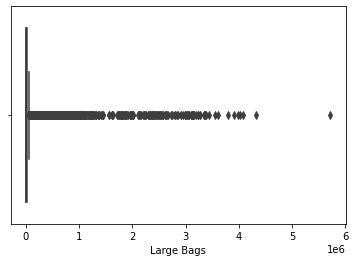

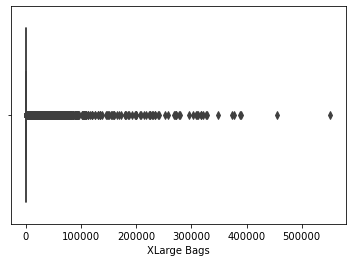

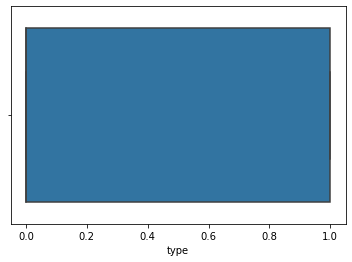

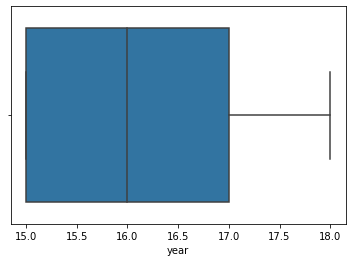

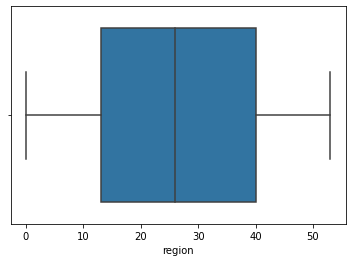

In [28]:
for i in df.columns:
    sn.boxplot(df[i])
    plt.show()

##### ouliers seen above is cause of natural variation so no need to remove it

In [29]:
y = df[['AveragePrice']].values
x = df.drop(columns = ['AveragePrice'])

#### Skewness Check

In [30]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

Date             0.106617
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64
8


###### 8 columns is highly skewed

In [31]:
#trying to remove skewness
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [32]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55

Date            0.106617
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
type            0.000329
year            0.215339
region          0.000030
dtype: float64
8


#### Feature Scaling

In [33]:
scaler = StandardScaler()
x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']] = scaler.fit_transform(x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,-0.373714,-0.659077,-0.034740,-0.516446,-0.598284,-0.499147,-0.726623,-0.497449,0,15,0
1,12,-0.416209,-0.695853,-0.104144,-0.502067,-0.578275,-0.477634,-0.723402,-0.497449,0,15,0
2,12,-0.186355,-0.682425,0.247649,-0.430509,-0.612653,-0.514969,-0.719251,-0.497449,0,15,0
3,12,-0.314419,-0.650891,0.070758,-0.484502,-0.681931,-0.591191,-0.699057,-0.497449,0,15,0
4,11,-0.435033,-0.667781,-0.110236,-0.480881,-0.669753,-0.580158,-0.665220,-0.497449,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,-0.670393,-0.589007,-0.788271,-0.734478,-0.493306,-0.392824,-0.582767,-0.497449,1,18,53
18245,1,-0.705946,-0.645993,-0.686526,-0.734478,-0.584109,-0.489994,-0.615341,-0.497449,1,18,53
18246,1,-0.707402,-0.645975,-0.732143,-0.195392,-0.580964,-0.479098,-0.776582,-0.497449,1,18,53
18247,1,-0.679622,-0.621105,-0.706268,-0.195622,-0.544766,-0.440319,-0.767092,-0.497449,1,18,53


#### Multicolinearity Check

In [34]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,3.902691,Date
1,313.479707,Total Volume
2,36.722968,4046
3,58.939909,4225
4,4.465365,4770
5,182.684428,Total Bags
6,97.029816,Small Bags
7,12.821669,Large Bags
8,2.636285,XLarge Bags
9,3.618126,type


##### Multicollinearity only affects the coefficients and p-values, but it does not influence the model’s ability to predict the dependent variable.

##### no need to drop columns as we will use PCA to remove the unwanted dimensions

In [35]:
for i in range(2,12):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.9663302221345592
3 0.9915762991675802
4 0.9950983672541065
5 0.9967634740647258
6 0.9978383319183839
7 0.9985465002405581
8 0.9991543376364874
9 0.9996709273285346
10 0.9999754734982422
11 0.9999915318139236


In [36]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)

##### Choosing 5 for max Data retention

In [38]:
#checking  best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,test_size=.30,random_state=i)
    mod= LarsCV()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.32175906030004076 on random state 190


In [39]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12774, 5)
(5475, 5)
(12774, 1)
(5475, 1)


##### 70% of the data will be available for training the model & 30% will be available for testing the model (5475)

### Model Building & Evaluation

In [41]:
models = [LarsCV(),LassoLarsCV(),LassoCV(),ElasticNetCV(),BayesianRidge(),GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(),XGBRegressor()]

In [42]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('----'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

----------------------------------------
LarsCV()
score 0.3031000944012802
r2 0.2966968316975215
diff 0.006403262703758739
mae 0.26735627757126146
rmse 0.33615335093613186
----------------------------------------
LassoLarsCV()
score 0.3031000944012802
r2 0.2966968316975215
diff 0.006403262703758739
mae 0.26735627757126146
rmse 0.33615335093613186
----------------------------------------
LassoCV()
score 0.3030965904440608
r2 0.2966545641472136
diff 0.006442026296847203
mae 0.26734609816599636
rmse 0.3361634519607274
----------------------------------------
ElasticNetCV()
score 0.30309607023102714
r2 0.2966518619943711
diff 0.006444208236656035
mae 0.2673449341685016
rmse 0.336164097706124
----------------------------------------
BayesianRidge()
score 0.30310087128794716
r2 0.29668779578426785
diff 0.006413075503679311
mae 0.267350006314269
rmse 0.3361555103482458
----------------------------------------
GradientBoostingRegressor()
score 0.6989040886434486
r2 0.7001065362379197
diff 0.00

#### XGBRegressor is best against all evaluation metrics having least difference

In [49]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,test_size=.30,random_state=i)
    mod= XGBRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.8881024652362939 on random state 94


### Hyperparameter Tuning

In [44]:
parameters={'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'n_estimators' : [100, 200, 500]}

In [45]:
clf = GridSearchCV(XGBRegressor(), parameters, cv=5,scoring="r2",n_jobs=-1,verbose=1)

In [46]:
clf.fit(principalComponents,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 14.2min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [47]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 500}

##### Fiiting the best Model with Evaluation metrics

In [50]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents, y,random_state = 94,test_size=0.30,shuffle=True)
model=XGBRegressor(learning_rate = 0.1,max_depth = 3,min_child_weight = 3,n_estimators = 500)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(model,x,y,cv=5)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.8368175395903572
mean absolute error: 0.12120072857146938
mean squared error: 0.027220497409499656
root mean square error: 0.16498635522218089
cross val score 0.4809360789140314
std err 0.20021323471869598


##### Observe actual vs predicted and thier difference

In [51]:
y_pred=model.predict(principalComponents)
data=x
data['AveragePricePred']=y_pred
data['AveragePrice']=y
data['differnce']=data['AveragePrice']-data['AveragePricePred']
data

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePricePred,AveragePrice,differnce
0,12,-0.373714,-0.659077,-0.034740,-0.516446,-0.598284,-0.499147,-0.726623,-0.497449,0,15,0,1.203877,1.33,0.126123
1,12,-0.416209,-0.695853,-0.104144,-0.502067,-0.578275,-0.477634,-0.723402,-0.497449,0,15,0,1.209553,1.35,0.140447
2,12,-0.186355,-0.682425,0.247649,-0.430509,-0.612653,-0.514969,-0.719251,-0.497449,0,15,0,1.123894,0.93,-0.193894
3,12,-0.314419,-0.650891,0.070758,-0.484502,-0.681931,-0.591191,-0.699057,-0.497449,0,15,0,1.188848,1.08,-0.108848
4,11,-0.435033,-0.667781,-0.110236,-0.480881,-0.669753,-0.580158,-0.665220,-0.497449,0,15,0,1.240483,1.28,0.039517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,-0.670393,-0.589007,-0.788271,-0.734478,-0.493306,-0.392824,-0.582767,-0.497449,1,18,53,1.532808,1.63,0.097192
18245,1,-0.705946,-0.645993,-0.686526,-0.734478,-0.584109,-0.489994,-0.615341,-0.497449,1,18,53,1.492685,1.71,0.217315
18246,1,-0.707402,-0.645975,-0.732143,-0.195392,-0.580964,-0.479098,-0.776582,-0.497449,1,18,53,1.593964,1.87,0.276036
18247,1,-0.679622,-0.621105,-0.706268,-0.195622,-0.544766,-0.440319,-0.767092,-0.497449,1,18,53,1.600472,1.93,0.329528


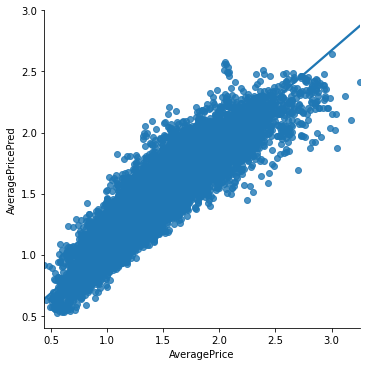

In [52]:
sn.lmplot(x='AveragePrice',y='AveragePricePred',data=data,palette='rainbow')

#### Visualize a linear relationship as determined through regression line to see how actual & predicted datapoints are close 

##### Check how similar are y_test and y_pred values

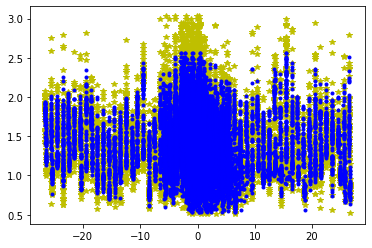

In [57]:
plt.plot(x_test,y_test,'y*')
plt.plot(x_test,model.predict(x_test),'b.')
plt.show()

In [ ]:
sn.distplot(data['AveragePrice'])
sn.distplot(data['AveragePricePred'])

##### Checked Distribution Plots

In [ ]:
joblib.dump(stack,'Avocado.pkl')